<a href="https://colab.research.google.com/github/vaishalibhardwaj/mazegenerator/blob/main/mazegenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

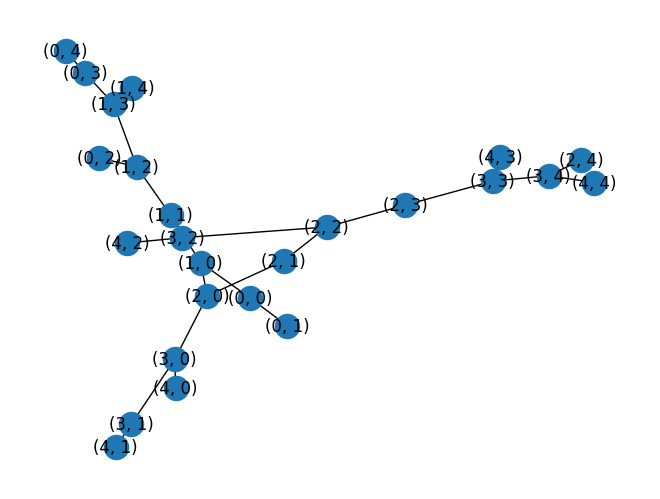

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def generate_maze(width, height):
    G = nx.grid_2d_graph(height, width)

    # here i assign random weights to edges
    for u, v in G.edges():
        G.edges[u, v]['weight'] = random.randint(1, 10)  # Random weight for each edge

    # Generate minimum spanning tree (MST)
    mst = nx.minimum_spanning_tree(G)

    return mst

maze = generate_maze(5, 5)
nx.draw(maze, with_labels=True)
plt.show()


In [3]:
def solve_maze(maze, start, end):
    if not nx.has_path(maze, start, end):
        return None

    # here i perform BFS to find the shortest path
    path = list(nx.bfs_edges(maze, start, reverse=False))
    path_nodes = [start] + [v for u, v in path]

    if end not in path_nodes:
        return None

    return path_nodes

start_node = (0, 0)
end_node = (4, 4)
solution_path = solve_maze(maze, start_node, end_node)

if solution_path:
    print("Solution Path:", solution_path)
else:
    print("No path found!")


Solution Path: [(0, 0), (1, 0), (0, 1), (1, 1), (2, 0), (1, 2), (3, 0), (2, 1), (1, 3), (0, 2), (3, 1), (4, 0), (2, 2), (0, 3), (1, 4), (4, 1), (3, 2), (2, 3), (0, 4), (4, 2), (3, 3), (4, 3), (3, 4), (4, 4), (2, 4)]


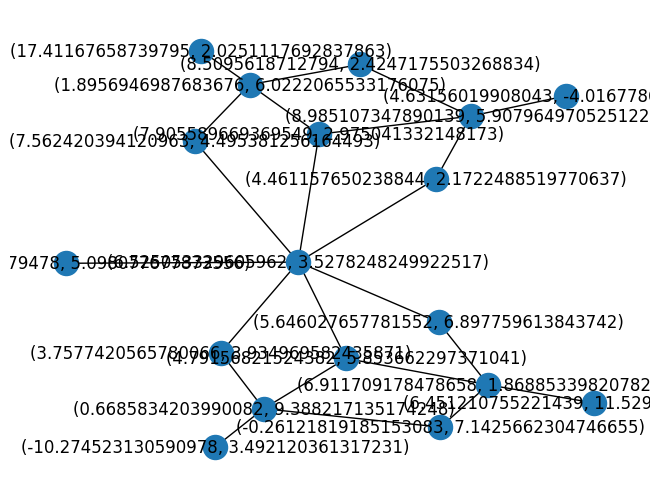

In [4]:
#the below is an alternative method for maze generation, introducing irregular-shaped mazes using Voronoi tessellation.
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_irregular_maze(num_points, width, height):
    points = np.random.rand(num_points, 2) * np.array([width, height])
    vor = Voronoi(points)

    # here i create a graph from Voronoi diagram
    G = nx.Graph()
    for i, region in enumerate(vor.regions):
        if not region or -1 in region:
            continue
        center = vor.points[i]
        for j in region:
            vertex = vor.vertices[j]
            dist = np.linalg.norm(center - vertex)
            G.add_edge(tuple(center), tuple(vertex), weight=dist)

    return G

irregular_maze = generate_irregular_maze(10, 10, 10)
nx.draw(irregular_maze, with_labels=True)
plt.show()


In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from ipywidgets import interact, IntSlider
import matplotlib.animation as animation


In [6]:
#visualising
def visualize_maze(width, height):
    maze = generate_maze(width, height)

    fig, ax = plt.subplots()
    plt.close()

    def update(step):
        ax.clear()
        path_nodes = solution_path[:step+1] if solution_path else []

        pos = {(x, y): (x, -y) for x, y in maze.nodes()}
        nx.draw(maze, pos=pos, ax=ax, with_labels=True, node_size=300, node_color='lightgray')

        # to highlight solution path
        nx.draw_networkx_nodes(maze, pos=pos, nodelist=path_nodes, node_size=300, node_color='orange')

        nx.draw_networkx_nodes(maze, pos=pos, nodelist=[start_node], node_size=300, node_color='green')
        nx.draw_networkx_nodes(maze, pos=pos, nodelist=[end_node], node_size=300, node_color='red')

        ax.set_title(f"Step {step}: Path Length = {len(path_nodes)-1}" if path_nodes else "No path found")

    ani = animation.FuncAnimation(fig, update, frames=len(solution_path) if solution_path else 1, repeat=False)

    @interact(step=IntSlider(min=0, max=len(solution_path)-1, step=1, value=0))
    def display_animation(step):
        update(step)
        plt.show()

start_node = (0, 0)
end_node = (4, 4)
solution_path = solve_maze(maze, start_node, end_node)
visualize_maze(5, 5)


interactive(children=(IntSlider(value=0, description='step', max=24), Output()), _dom_classes=('widget-interac…

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
